In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../Data/cleaned_train.csv")

In [11]:
df = df.drop(["ID", "Customer_ID", "Name", "SSN", "Occupation"], axis=1)

df["Credit_Score"] = df["Credit_Score"].map({"Good":2, "Standard":1, "Poor":0})

X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]

In [12]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,88582,88583,88584,88585,88586,88587,88588,88589,88590,88591
Month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,1.000000,2.000000,...,7.000000,8.000000,1.00000,2.00000,3.00000,4.00000,5.00000,6.00000,7.00000,8.00000
Age,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,28.000000,28.000000,...,28.000000,28.000000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000
Annual_Income,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,34847.840000,34847.840000,...,20002.880000,20002.880000,39628.99000,39628.99000,39628.99000,39628.99000,39628.99000,39628.99000,39628.99000,39628.99000
Monthly_Inhand_Salary,1824.840000,1824.840000,1824.840000,1824.840000,1824.840000,1824.840000,1824.840000,1824.840000,3037.990000,3037.990000,...,1929.910000,1929.910000,3359.42000,3359.42000,3359.42000,3359.42000,3359.42000,3359.42000,3359.42000,3359.42000
Num_Bank_Accounts,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,...,10.000000,10.000000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000
Num_Credit_Card,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,8.000000,8.000000,6.00000,6.00000,6.00000,6.00000,6.00000,6.00000,6.00000,6.00000
Interest_Rate,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000,6.000000,...,29.000000,29.000000,7.00000,7.00000,7.00000,7.00000,7.00000,7.00000,7.00000,7.00000
Num_of_Loan,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,...,5.000000,5.000000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
Type_of_Loan,-0.076449,-0.076449,-0.076449,-0.076449,-0.076449,-0.076449,-0.076449,-0.076449,0.084961,0.084961,...,0.171176,0.171176,0.26889,0.26889,0.26889,0.26889,0.26889,0.26889,0.26889,0.26889
Delay_from_due_date,3.000000,-1.000000,3.000000,5.000000,6.000000,8.000000,3.000000,3.000000,3.000000,7.000000,...,33.000000,33.000000,23.00000,23.00000,20.00000,23.00000,18.00000,27.00000,20.00000,18.00000


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [17]:
from keras.utils import to_categorical


X_reshaped = X_scaled.reshape(11074, 8, 23, 1)
y_one_hot = to_categorical(y)

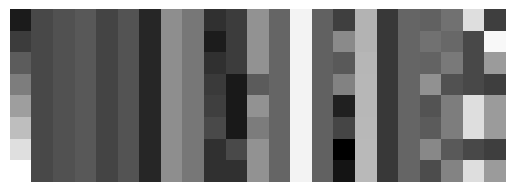

In [18]:
import matplotlib.pyplot as plt


image = X_reshaped[0].reshape(8, 23)  # Reshape back to 2D for visualization

plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide axes for cleaner display
plt.show()

In [19]:
y_one_hot = y_one_hot[7::8]

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_reshaped, y_one_hot, test_size=0.2, random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [22]:
batch_size = 64
epochs = 100
num_classes = 3

In [29]:
from keras.models import Sequential
from keras.layers import InputLayer,Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,LeakyReLU
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

modeld = Sequential()
modeld.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(8,23,1)))
modeld.add(MaxPooling2D((3, 3),padding='same'))
modeld.add(Dropout(0.25))
modeld.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
modeld.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
modeld.add(Dropout(0.25))
modeld.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
modeld.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
modeld.add(Dropout(0.4))
modeld.add(Flatten())
modeld.add(Dense(128, activation='relu'))
modeld.add(Dropout(0.3))
modeld.add(Dense(64, activation='relu'))
modeld.add(Dropout(0.2))
modeld.add(Dense(32, activation='relu'))
modeld.add(Dropout(0.1))
modeld.add(Dense(num_classes, activation='softmax'))


In [30]:
modeld.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 8, 23, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,619 (467.26 KB)

 Trainable params: 119,619 (467.26 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
modeld.compile(loss=categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])

In [32]:
early_stopping = EarlyStopping(monitor='val_loss',  # Can also monitor 'val_accuracy'
                               patience=10,  # Number of epochs to wait for improvement
                               restore_best_weights=True)


In [33]:
results=modeld.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5017 - loss: 1.0329 - val_accuracy: 0.5612 - val_loss: 0.9004
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5496 - loss: 0.9247 - val_accuracy: 0.5743 - val_loss: 0.8753
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5650 - loss: 0.8940 - val_accuracy: 0.5847 - val_loss: 0.8416
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5773 - loss: 0.8665 - val_accuracy: 0.6000 - val_loss: 0.8246
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5904 - loss: 0.8517 - val_accuracy: 0.6054 - val_loss: 0.8078
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5879 - loss: 0.8465 - val_accuracy: 0.6226 - val_loss: 0.8016
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6049 - loss: 0.8483 - val_accuracy: 0.6230 - val_loss: 0.7913
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6039 - loss: 0.8234 - val_accu

In [43]:
from keras.models import Sequential
from keras.layers import InputLayer,Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,LeakyReLU
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

modeld = Sequential()
modeld.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(8,23,1)))
modeld.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modeld.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

modeld.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modeld.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modeld.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

modeld.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modeld.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modeld.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modeld.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

modeld.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
modeld.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
modeld.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
modeld.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

modeld.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
modeld.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
modeld.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
modeld.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

modeld.add(Flatten())
modeld.add(Dense(4096, activation='relu'))
modeld.add(Dropout(0.5))
modeld.add(Dense(4096, activation='relu'))
modeld.add(Dropout(0.5))
modeld.add(Dense(3, activation='softmax'))


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
modeld.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 8, 23, 64)      │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 8, 23, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 4, 12, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 4, 12, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 4, 12, 128)     │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 2, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 2, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 2, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 1, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 1, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 1, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 1, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 1, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 1, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 1, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 1, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,608,387 (128.21 MB)

 Trainable params: 33,608,387 (128.21 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
modeld.compile(loss=categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])

In [48]:
early_stopping = EarlyStopping(monitor='val_loss',  # Can also monitor 'val_accuracy'
                               patience=10,  # Number of epochs to wait for improvement
                               restore_best_weights=True)


In [49]:
results=modeld.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 54s 496ms/step - accuracy: 0.5118 - loss: 1.0528 - val_accuracy: 0.5097 - val_loss: 1.0171
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 52s 499ms/step - accuracy: 0.5286 - loss: 1.0038 - val_accuracy: 0.5097 - val_loss: 1.0090
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 52s 500ms/step - accuracy: 0.5127 - loss: 1.0171 - val_accuracy: 0.5097 - val_loss: 1.0104
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 52s 500ms/step - accuracy: 0.5204 - loss: 1.0062 - val_accuracy: 0.5097 - val_loss: 1.0140
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 52s 500ms/step - accuracy: 0.5052 - loss: 1.0202 - val_accuracy: 0.5097 - val_loss: 1.0106
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 52s 500ms/step - accuracy: 0.5202 - loss: 1.0047 - val_accuracy: 0.5097 - val_loss: 1.0106
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 52s 499ms/step - accuracy: 0.5184 - loss: 1.0101 - val_accuracy: 0.5097 - val_loss: 1.0109
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 51s 495ms/step - accuracy: 0.5208 -